### Problem Statement
##### Classifying users as approved or rejected to receive credit card
##### Label 0 indicates application approved
##### Label 1 indicates application rejected

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Data Ingestion  and Data Preparation
#### Dataset was obtained from kaggle
#### https://www.kaggle.com/datasets/rohitudageri/credit-card-details?select=Credit_card.csv

In [2]:
df1 = pd.read_csv("Credit_card.csv")
df2 = pd.read_csv("Credit_card_label.csv")
df1.head(10)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
5,5009753,NaN,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
7,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22134.0,365243,1,0,0,0,NaN,2
8,5010864,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3
9,5010868,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3


In [3]:
df2.head(10)

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1
5,5009753,1
6,5009754,1
7,5009894,1
8,5010864,1
9,5010868,1


In [4]:
#merge the two datasets
df = pd.merge(df1, df2, on="Ind_ID")
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [6]:
df.shape

(1548, 19)

In [7]:
#change the column headers into lower case
df.columns = df.columns.str.lower()

In [8]:
df.columns

Index(['ind_id', 'gender', 'car_owner', 'propert_owner', 'children',
       'annual_income', 'type_income', 'education', 'marital_status',
       'housing_type', 'birthday_count', 'employed_days', 'mobile_phone',
       'work_phone', 'phone', 'email_id', 'type_occupation', 'family_members',
       'label'],
      dtype='object')

In [21]:
#rename propert_owner to property_owner
df.rename(columns={'propert_owner':'property_owner'}, inplace=True)

In [22]:
#display the descriptive statistics of the numeric data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ind_id,1548.0,5.078920e+06,41717.587742,5008827.0,5045069.75,5078841.5,5115673.00,5150412.0
children,1548.0,4.127907e-01,0.776691,0.0,0.00,0.0,1.00,14.0
annual_income,1548.0,1.913993e+05,112407.951318,33750.0,121500.00,171000.0,225000.00,1575000.0
birthday_count,1548.0,-1.604034e+04,4199.321477,-24946.0,-19476.00,-15814.5,-12483.00,-7705.0
employed_days,1548.0,5.936469e+04,137808.062701,-14887.0,-3174.50,-1565.0,-431.75,365243.0
mobile_phone,1548.0,1.000000e+00,0.000000,1.0,1.00,1.0,1.00,1.0
work_phone,1548.0,2.080103e-01,0.406015,0.0,0.00,0.0,0.00,1.0
phone,1548.0,3.094315e-01,0.462409,0.0,0.00,0.0,1.00,1.0
email_id,1548.0,9.237726e-02,0.289651,0.0,0.00,0.0,0.00,1.0
family_members,1548.0,2.161499e+00,0.947772,1.0,2.00,2.0,3.00,15.0


In [23]:
#check for duplicate and null values
df.duplicated().sum()

0

In [24]:
df.isna().sum()

ind_id             0
gender             0
car_owner          0
property_owner     0
children           0
annual_income      0
type_income        0
education          0
marital_status     0
housing_type       0
birthday_count     0
employed_days      0
mobile_phone       0
work_phone         0
phone              0
email_id           0
type_occupation    0
family_members     0
label              0
dtype: int64

In [25]:
#we select the numeric data and fill the nan values with mean values
df.fillna(df.mean(numeric_only=True).round(1), inplace=True)
df.select_dtypes(include = "number")

,ind_id,children,annual_income,birthday_count,employed_days,mobile_phone,work_phone,phone,email_id,family_members,label
0,5008827,0,180000.0,-18772.0,365243,1,0,0,0,2,1
1,5009744,0,315000.0,-13557.0,-586,1,1,1,0,2,1
2,5009746,0,315000.0,-16040.3,-586,1,1,1,0,2,1
3,5009749,0,191399.3,-13557.0,-586,1,1,1,0,2,1
4,5009752,0,315000.0,-13557.0,-586,1,1,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,191399.3,-11957.0,-2182,1,0,0,0,2,0
1544,5023655,0,225000.0,-10229.0,-1209,1,0,0,0,1,0
1545,5115992,2,180000.0,-13174.0,-2477,1,0,0,0,4,0
1546,5118219,0,270000.0,-15292.0,-645,1,1,1,0,2,0


In [19]:
#fill each of the categorical columns fil the null values with the most occuring string value
categorical = df.select_dtypes(include=['object']).columns
df[categorical] = df[categorical].fillna(df[categorical].mode().iloc[0])

In [26]:
df.isna().sum()

ind_id             0
gender             0
car_owner          0
property_owner     0
children           0
annual_income      0
type_income        0
education          0
marital_status     0
housing_type       0
birthday_count     0
employed_days      0
mobile_phone       0
work_phone         0
phone              0
email_id           0
type_occupation    0
family_members     0
label              0
dtype: int64

### Univariate Analysis

In [31]:
def univariate_analysis(series, title):
    plt.title(title)
    series.value_counts().plot(kind='bar',figsize=(8,7))

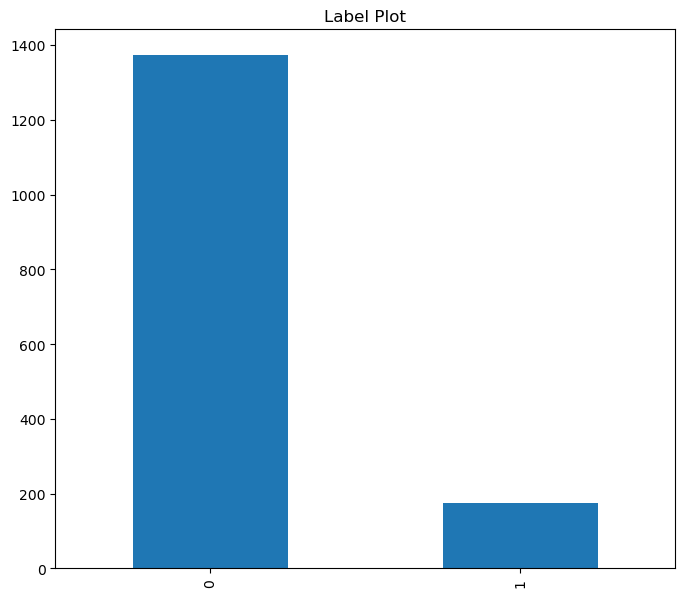

In [32]:
univariate_analysis(df.label, "Label Plot")

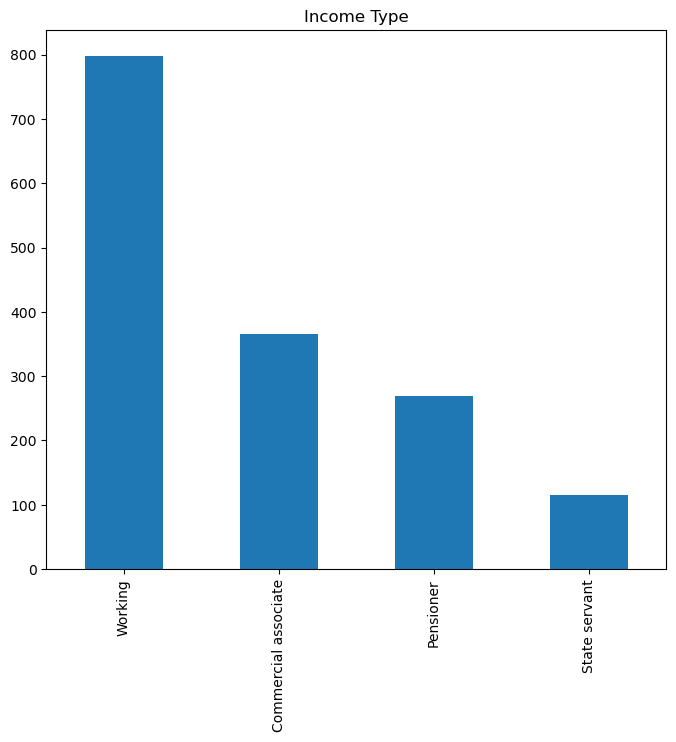

In [35]:
univariate_analysis(df.type_income, "Income Type")

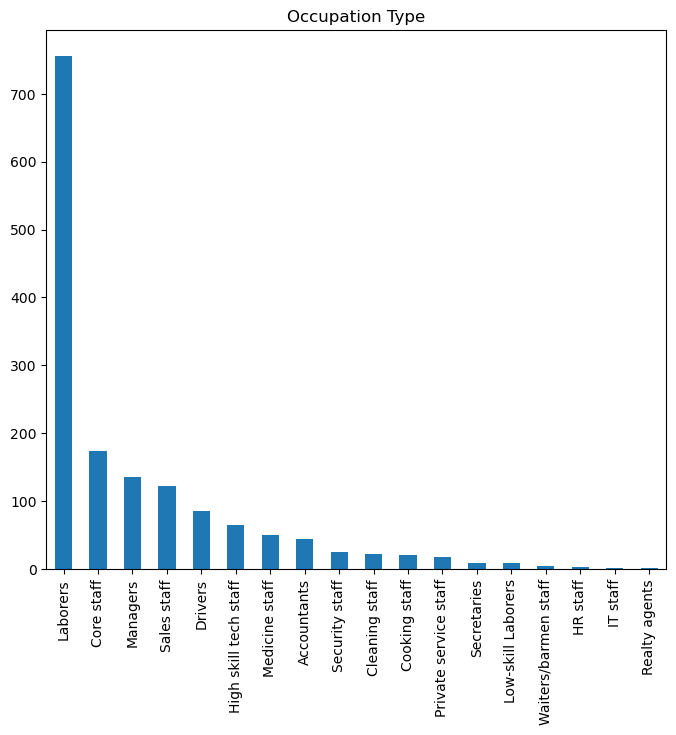

In [36]:
univariate_analysis(df.type_occupation, "Occupation Type")    

### Bivariate and Multivariate Analysis

<Figure size 2000x800 with 0 Axes>

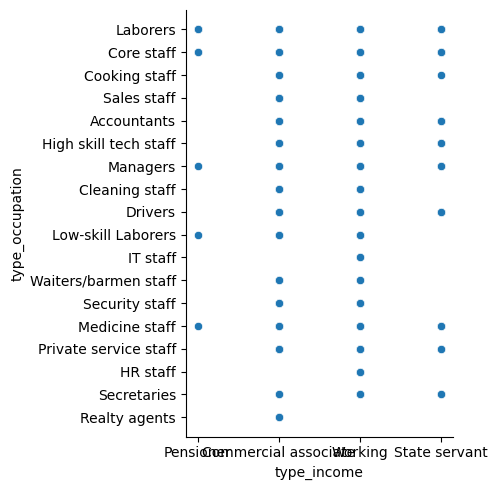

In [67]:
plt.figure(figsize=(20, 8))
sns.relplot(
    data =df,
    x=df.type_income,
    y=df.type_occupation,
    sizes=(25, 15)
)